# Homework no.2
**Student name:** Mohammad Amin Dadgar <br>
**Student Id:** 4003624016

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans 

# Q1
Using the training set below answer these question.
\begin{equation}
\text{Training Set }= \{(0.5, 2), (0.7, 3),(1, 8), (1.5, 10), (2, 10.3), (2.7, 5.5), (3, 8), (3.3, 11), (4, 10.2), (4.3, 12)\}
\end{equation}
Each data is $(x_i, y_i)$

## P1
fit the model $y=ax^2+bx+c$ on the given dataset and name the model as model_1. This means
\begin{equation}
\phi_1(x) = 
\begin{bmatrix}
1 \\
x \\
x^2 \\
\end{bmatrix}
\end{equation}
And the weights matrix is
\begin{equation}
W_1 = 
\begin{bmatrix}
c \\
b \\
a \\
\end{bmatrix}
\end{equation}

In [2]:
def model_1(training_set):
    """
    Linear Regression using quadratic function as the kernel function

    
    Parameters:
    -----------
    training_set : array of tuples
        array of `x_i` and `y_i`
        `x` the input variables
        `y` are the output variables
        
    Returns:
    ----------
    w : matrix_like
        the matrix of learned weights
    """
    ## Extract the X values and covert them using kernel function
    X = np.array(training_set)[:, 0]
    X = np.matrix(X).T
    
    ## apply the quadratic function to input data
    X_phi = kernel_Quadratic(X)
    ## extract the outputs
    Y = np.array(training_set)[:, 1]
    Y = np.matrix(Y)

    ## the `A` and `b` parameters of a Linear Regression function
    A = X_phi @ X_phi.T
    b = np.multiply(Y, X_phi)
    b = np.sum(b, axis=1)
    
    w = np.dot(np.linalg.inv(A), b)
    return w
    
    
def kernel_Quadratic(X):
    """
    The quadratic kernel function
    
    Parameters:
    -----------
    X : array_like
        the variables to be converted
   
    Returns:
    --------
    phi : array_like
        the quadratic function applied to `X`
    """
    ## first convert to a numpy array and copy it
    X_new = np.array(X).copy()
    
    ones_arr = np.ones(len(X))
    ones_arr = np.matrix(ones_arr)
    
    X_power_2 = np.power(X_new, 2)

    phi = np.vstack((ones_arr, X_new.T, X_power_2.T))
    
    return phi

In [3]:
train = [(0.5,2),(0.7,3),(1,8),(1.5,10),(2,10.3),(2.7,5.5),(3,8),(3.3,11),(4,10.2),(4.3,12)]
train = np.array(train)

In [4]:
model1_weight = model_1(train)
model1_weight

matrix([[ 1.94132333],
        [ 4.13814418],
        [-0.49656258]])

## P2
fit the model $y=ax^3+bx^2+cx+d$ on the given dataset and name the model as model_2. This means
\begin{equation}
\phi_2(x) = 
\begin{bmatrix}
1 \\
x \\
x^2 \\
x^3 \\
\end{bmatrix}
\end{equation}
And the weights matrix is
\begin{equation}
W_2 = 
\begin{bmatrix}
d \\
c \\
b \\
a \\
\end{bmatrix}
\end{equation}

In [5]:
def mode_2(training_set):
    """
    Linear Regression function using ```ax^3 + bx^2 + cx + d``` as kernel function
    
    Parameters:
    -----------
    training_set : array of tuples
        array of `x_i` and `y_i`
        `x` the input variables
        `y` are the output variables
        
    Returns:
    ----------
    w : matrix_like
        the matrix of learned weights
    """

    ## Extract the X values and covert them using kernel function
    X = np.array(training_set)[:, 0]
    X = np.matrix(X).T
    
    ## apply the quadratic function to input data
    X_phi = kernel_cubic(X)
    ## extract the outputs
    Y = np.array(training_set)[:, 1]
    Y = np.matrix(Y)

    ## the `A` and `b` parameters of a Linear Regression function
    A = X_phi @ X_phi.T
    b = np.multiply(Y, X_phi)
    b = np.sum(b, axis=1)
    
    w = np.dot(np.linalg.inv(A), b)
    return w

def kernel_cubic(X):
    """
    The cubic function
    
    
    Parameters:
    -----------
    X : array_like
        the variables to be converted
        
    Returns:
    --------
    phi : array_like
        the quadratic function applied to `X`
    """
    
    ## first convert to a numpy array and copy it
    X_new = np.array(X).copy()
    
    ones_arr = np.ones(len(X))
    ones_arr = np.matrix(ones_arr)
    
    X_power_2 = np.power(X_new, 2)
    X_power_3 = np.power(X_new, 3)

    phi = np.vstack((ones_arr, X_new.T, X_power_2.T, X_power_3.T))
    
    return phi

In [6]:
model2_weight = mode_2(train)
model2_weight

matrix([[-7.33397387],
        [22.63114975],
        [-9.53106286],
        [ 1.24181752]])

## P3
Calculate the MSE for $\text{model}_1$ and $\text{model}_2$ using the dataset below
\begin{equation}
\text{Test set }= \{(3.8, 12.9), (1, 9),(2, 8), (1.9, 9), (1.5, 7), (1.6, 9.5), (1.2, 10), (3.3, 11), (1.5, 11), (4, 6)\}
\end{equation}

In [7]:
test = np.array(((3.8, 12.9), (1, 9),(2, 8), (1.9, 9), 
                    (1.5, 7), (1.6, 9.5), (1.2, 10), (3.3, 11),
                    (1.5, 11), (4, 6)))
test

array([[ 3.8, 12.9],
       [ 1. ,  9. ],
       [ 2. ,  8. ],
       [ 1.9,  9. ],
       [ 1.5,  7. ],
       [ 1.6,  9.5],
       [ 1.2, 10. ],
       [ 3.3, 11. ],
       [ 1.5, 11. ],
       [ 4. ,  6. ]])

In [8]:
## applying model_1
def model_predict(weights, data, **kwargs):
    """
    predict the output of a model in this question 
    using the trained weights for the data
    
    the desired model can be selected using the quadratic or the cubic parameter
    
    Parameters:
    ------------
    weights : array_like
        the learned parameters for model1
    data : array or scaler
        the desired data for prediction task
    kwargs : 
        quadratics : use the model_1 in this question 
        cubic : use the model_2 in this question
        
    **NOTE:** one of the parameters can be choosed!
    **NOTE:** any value can be passed to kwargs, there is no difference in that. (because the value would not be used)
    
    Returns:
    --------
    prediction : array or scaler
        the predicted output value for the input data
    """
    
    ## first we need to apply the transformation for the data 
    ## as the learned parameters are trained using the transformation
    if 'quadratics' in kwargs and 'cubic' in kwargs:
        raise ValueError("Both parameters cannot be chosen! They have different behaviour")
    elif 'quadratics' in kwargs:
        data_phi = kernel_Quadratic(data) 
    elif 'cubic' in kwargs:
        data_phi = kernel_cubic(data) 
    else:
        raise ValueError("no parameters cubic or quadratics was chosen!")
        
    prediction = np.matrix(weights).T @ data_phi
    
    return prediction

In [9]:
def calculate_MSE(true_outputs, predicted_outputs):
    """
    calculate the Mean Squared Error for the predicted data
    
    Parameters:
    ------------
    true_outputs : array_like 
        the actual output of the data
    predicted_outputs : array_like
        the predicted outputs for the data
        
    Returns:
    ---------
    mse_value : float
        the mean squared error value
    """
    
    ## the difference 
    diff = predicted_outputs - true_outputs
    ## squeare the difference
    diff = np.power(diff, 2)
    
    ## find the mean value
    mse_value = np.mean(diff)
    
    return mse_value
    

In [10]:
pred_model1_test = model_predict(model1_weight, test[:, 0], quadratics='True')
pred_model2_test = model_predict(model2_weight, test[:, 0], cubic='True')

In [11]:
mse_model1 = calculate_MSE(test[:, 1], pred_model1_test)
mse_model2 = calculate_MSE(test[:, 1], pred_model2_test)
print(f'MSE for model1 is {mse_model1}')
print(f'MSE for model2 is {mse_model2}')

MSE for model1 is 7.496789449073051
MSE for model2 is 5.812331603917104


## P4

To find the T value for our datasets we need to use the equation below
\begin{equation}
T = \frac{mean_1 - mean_2}{\frac{std(diffrences)}{\sqrt{n}}}
\end{equation}
refrence: https://www.investopedia.com/terms/t/t-test.asp

In [12]:
def calculate_T_value(dataset1, dataset2):
    """
    Find the T-value for two datasets
    
    Parameters:
    ------------
    dataset1 : array_of_Tuples
        (`x_i`, `y_i`) data, `x` representing data and `y` representig label
    dataset2 : array_of_Tuples
        (`x_i`, `y_i`) data, `x` representing data and `y` representig label

    Returns:
    ---------
    T_value : float
        the T value for datasets
    """
    ## convert to numpy array for ease of use
    set1 = np.array(dataset1)
    set2 = np.array(dataset2)
    
    ## calculate the medians
    m1 = np.mean(set1[:, 1])
    m2 = np.mean(set2[:, 1])
    
    ## find the differences
    diff = set1[:, 1] - set2[:, 1]
    
    ## below the division
    below = np.std(diff) / np.sqrt(len(diff))
    
    above = m1 - m2
    
    T_value = above / below
    
    return T_value

In [13]:
calculate_T_value(train, test)

-0.9350212787977713

In [14]:
z = (train[:, 1] - np.mean(train[:, 1]- test[:, 1]) ) / np.std(train[:, 1] - test[:, 1])

In [15]:
np.mean(z)

2.0609315717988514

TODO: As we can see the value for T-test is about `-0.935` and it is not out of the [-1.96, 1.96]. So we can say that the 

# Q2
TODO

# Q3
Use housing data in Homework no.1 and the linear regression model. The kernel function is
\begin{equation}
\phi_j(x) = exp[-\frac{1}{2} \beta (x-m_j)^T(x-m_j)]
\end{equation}
Find the parameters of the weight $w$.

In [30]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_housing = pd.read_csv('../HW1/hw1_data/housing/housing.txt', delimiter=' +'
            , engine='python', names=columns, index_col=False)

In [31]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
df_housing.shape

(506, 14)

In [33]:
## removing label
df_X = df_housing[columns[:-1]]

In [34]:
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## P1
Using 
\begin{equation}
\phi_j(x) = exp[-\frac{1}{2} \beta (x-m_j)^T(x-m_j)]
\end{equation}

In [308]:
!python3 scripts/main2_4_1.py learning_rate=0 iterations=500

Linear Regression on classification dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
[[0.498975   0.99751585 0.27459872 0.93107699 0.99453893 0.96908861
  0.96623628 0.77698029 0.96903509 0.47654849]
 [0.40486622 0.98679349 0.22287077 0.86514918 0.9763808  0.91296394
  0.96110207 0.73755377 0.99399332 0.38686512]]
Test set head :
[[0.50589257 0.96195437 0.38075955 0.91722185 0.95335867 0.92079056
  0.90269006 0.9156303  0.92023022 0.52317409]
 [0.52310506 0.99724226 0.30799186 0.94618438 0.98338536 0.95258474
  0.93599425 0.82034324 0.95425447 0.50858823]]
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error:
 [62.67653522]
 Test Error: 
  4986.97115605975
 Final Weights of the

## P2
And using the other kernel function
\begin{equation}
\phi_j(x) = \sigma\{a||x-m_j||\}
\end{equation}

In [309]:
!python3 scripts/main2_4_1.py learning_rate=0 iterations=500

Linear Regression on classification dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
[[ 1.07956694 13.2619483   4.01649081  1.00458072  1.15354131  1.06494048
   1.07111885  1.65647289  1.01282826  4.40342042]
 [ 1.22564921 20.13251952  6.10072219  1.02583593  1.33604887  1.0121326
   1.08259325  1.83830247  1.06031624  6.68167274]]
Test set head :
[[ 1.19721517  6.89767518  3.90739883  1.08127911  1.18865428  1.18089521
   1.22723299  1.1927901   1.1035626   3.65352341]
 [ 1.12006533 10.54206949  3.65448769  1.00633977  1.11699903  1.09818608
   1.14145285  1.4859806   1.03688092  3.86608794]]
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error:
 [61.89315891]
 Test Error: 
 

We've set the $\beta$ and $\alpha$ value to $0.00001$. Setting these hyperparameters to higher values near and more than $1$ can occure overflow due to very high values. 

# Q4

## P1
Plot the training and the test data and answer the question that "Are the data linearly separable?"

In [20]:
cols = ['X', 'Y', 'label']
train_ds = pd.read_csv('./hw2_data/classification_trn.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')
train_ds.shape

(250, 3)

In [21]:
train_ds.head()

,X,Y,label
0,0.462766,0.339111,1
1,0.779089,0.894436,1
2,0.067501,0.846257,1
3,-0.048451,0.142165,1
4,-0.529524,0.792441,1


In [22]:
cols = ['X', 'Y', 'label']
test_ds = pd.read_csv('./hw2_data/classification_tst.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')
test_ds.shape

(100, 3)

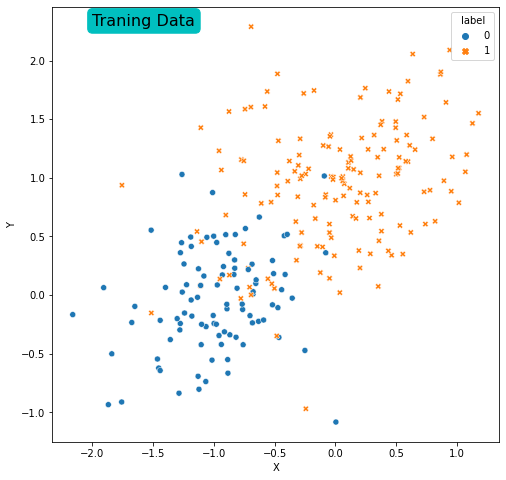

In [23]:
## plotting the training data
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_ds, x='X', y='Y',
                style='label',
                hue='label')
plt.text(y=2.3, x=-2, s='Traning Data', size=16, bbox=dict(boxstyle='round',
                                                          color='c'))
plt.show()

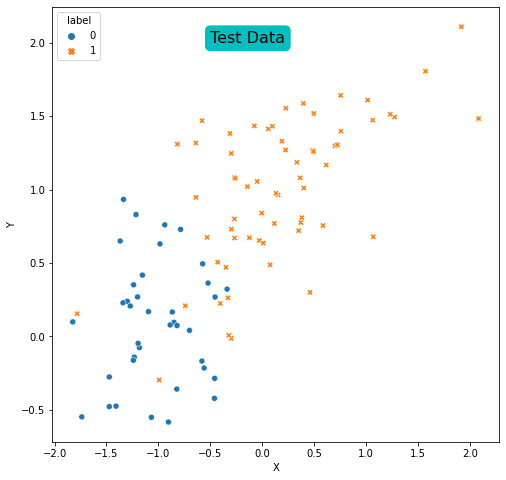

In [33]:
## plotting the test data
plt.figure(figsize=(8,8))
sns.scatterplot(data=test_ds, x='X', y='Y',
                style='label',
                hue='label')
plt.text(y=2, x=-0.5, s='Test Data', size=16, bbox=dict(boxstyle='round',
                                                          color='c'))
plt.show()

It is possible to see that the data is not linearly separable in training set.

## P2, P3, P4
**Question**: Find the gradient descent formulas in order to maximize the likelihood of the regression and using the initial weights as $1$ apply the learning rate $\frac{1}{t}$. ($t$ is the time steps $1, 2, ..., T$)

\begin{equation}
W^{new} \leftarrow W^{old} + \alpha(i)\sum_{i=1}^{n} \big( y_i - f(x_i, W^{old})\big) x_{i} \\
\text{Where }\alpha(i) = \frac{1}{i} \text{ For i=1, 2, ...}
\end{equation}

The `learning_rate=0` corresponds to $\frac{2}{t}$ and the `learning_rate=1` corresponds to $\frac{1}{\sqrt{t}}$.
Also the iterations can be adjusted using the argument `iterations`.

The errors are plotted in images that are saved within the HW2 folder.

In [34]:
!python3 scripts/main2_5.py learning_rate=0 iterations=500

Logistic Regression on classification dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient desc

## P5
The learning rate is $\frac{1}{t}$ in the cell below

In [57]:
!python3 scripts/main2_5.py learning_rate=1 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

And using static learning rate `0.5` in below

In [56]:
!python3 scripts/main2_5.py learning_rate=0.5 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In high iteration counts there is no obvious difference between different learning rates. To find the difference we used 50 iterations in below

In [55]:
!python3 scripts/main2_5.py learning_rate=0 iterations=50

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [54]:
!python3 scripts/main2_5.py learning_rate=1 iterations=50

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [53]:
## And static learning rate
!python3 scripts/main2_5.py learning_rate=0.5 iterations=500

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

We lower the iteration counts more to see better the differences 

In [52]:
!python3 scripts/main2_5.py learning_rate=0 iterations=5

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [51]:
!python3 scripts/main2_5.py learning_rate=1 iterations=5

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In [50]:
!python3 scripts/main2_5.py learning_rate=0.5 iterations=5

Logistic Regression on housing dataset!
----------------------------------------------------------------------
----------------------------------------------------------------------
Loading Training and Test sets
datasets loaded!
Train set head:
          X         Y
0  0.462766  0.339111
1  0.779089  0.894436
2  0.067501  0.846257
3 -0.048451  0.142165
4 -0.529524  0.792441
Test set head :
          X         Y
0 -0.521659  0.363769
1 -0.993098 -0.295949
2  2.083345  1.483410
3 -0.866462  0.166879
4 -1.182918 -0.075403
----------------------------------------------------------------------
----------------------------------------------------------------------
Closed Form Training: 
 Train Error: 
  Mean Squared Error: 0.18533821040260134
 Test Error: 
  0.28
 Final Weights of the closed form training
[-0.10041674  0.74624728]
----------------------------------------------------------------------
----------------------------------------------------------------------
Gradient descent For

In the results we can see that there may be a little difference and the static learning rate `0.5` show the better results on Test Error in Incremental learning Gradient Descent.

## P6
Comparing the Incremental version of logisitic regression with the normal version shows that it can achive better results with high iteration counts.

# Q5
The data is used from the question 4 and Nive bayes method will be applied.

In [98]:
def probability_normal_distribution(X, mu, sigma):
    """
    The probability value for normal distribution function
    
    Parameters:
    ------------
    x : array_like
        the input data
    mu : float
        the mean value given
    sigma : float
        the variance given 
        
    Returns:
    --------
    probability : float
        the probability value for the x input values 
    """
    ## we've divided the equation in two parts
    p1 = 1 / (np.sqrt(np.pi * 2) * sigma)
    p2 = np.exp(-0.5 * ((X-mu) / sigma)**2 )
    
    probability = p1 * p2
    
    return probability
    
def find_MLE_Normal_distro(X):
    """
    the maximum likelihood estimation for parameters of normal distribution
    the parameters for normal distribution is covariance matrix and mean vector
    
    Parameters:
    ------------
    X : array_like
        the X input data vectors
    
    Returns:
    ---------
    mu : array_like
        the means vector
    variance : matrix_like
        the matrix representing the covariance

    """
    X = np.array(X)
    
    mu = (1 / len(X)) * np.sum(X)
    
    ## some changes was made to the ML estimation of variance
    ## because of dataset shape
    variance = np.sqrt((1 / len(X)) * np.sum((X - mu)**2))    
    
    return mu, variance

In [58]:
cols = ['X', 'Y', 'label']
train_ds = pd.read_csv('./hw2_data/classification_trn.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')

test_ds = pd.read_csv('./hw2_data/classification_tst.txt',
                       delimiter=' +',
                      names=cols,
                      index_col=False,
                      engine='python')

In Naive Bayes the class conditional density can be computed by
\begin{equation}
p(x|c=1) = \prod_{i=1}^{d} p(x_i | c=1) \\
p(x|c=0) = \prod_{i=1}^{d} p(x_i | c=0) 
\end{equation}

In [72]:
## divide the dataset into 0 and 1 labels
train_ds_0 = train_ds[train_ds.label == 0]
test_ds_1 = train_ds[train_ds.label == 1]

In [128]:
## dictionary of maximum likelihood estimations
MLE_estimates = {}
for feature in ['X', 'Y']:
    for label in [0, 1]:
        mu, var = find_MLE_Normal_distro(train_ds[train_ds.label == label][feature])
        ## each feature of class estimation
        MLE_estimates[f'{feature},{label}'] = [mu, var]

In [129]:
MLE_estimates

{'X,0': [-0.9766294551726316, 0.4043628347745132],
 'X,1': [0.01564038684774194, 0.574343819845795],
 'Y,0': [-0.04355836269157895, 0.42688761701060846],
 'Y,1': [0.9415618305584516, 0.5324787748723679]}

In [268]:
def predict_NB(X, MLE_estimations):
    """
    predict the class Using Naive bayes algorithm
    
    Parameters:
    ------------
    X : pandas dataframe
        Input data, `X` and `Y` should be the features
    MLE_estimations : dictionary
        Maximum likelihood estimations corresponding to each dimension and class as a dictionary with keys like `X,0`
        meaning X as first feature and 0 as first class 
        
    Returns:
    ---------
    prediction : array_like
        the array representing the probability of each class for data
    """
    ## the predicted value for each data
    prediction = []
    for idx in range(len(X)):
        ## initialize Class probability array
        class_p_arr = []
        for i in [0, 1]:
            ## multiply probability for each dimension
            p = 1
            for feature in ['X', 'Y']:
                mu, var = MLE_estimations[f'{feature},{i}']
                p = p * probability_normal_distribution(X.iloc[idx][feature],mu, var)
            class_p_arr.append(p)
        ## save each class probability of each data
        prediction.append(class_p_arr)
    
    ## for ease of use convert to numpy
    prediction = np.array(prediction)
    return prediction

In [276]:
results  = predict_NB(train_ds[['X', 'Y']], MLE_estimates)
results.shape

(250, 2)

In [270]:
results[:4]

array([[1.09327234e-03, 2.02663171e-01],
       [6.64630522e-06, 2.14271447e-01],
       [3.74476058e-03, 5.10057518e-01],
       [6.01875199e-02, 1.67582766e-01]])

In [277]:
y_pred = (results[:, 0] >= results[:, 1]).astype(int)

In [283]:
def probability_multivariate_normal_distribution(X,mu, sigma):
    """
    The probability value for multivariate normal distribution function
    
    Parameters:
    ------------
    x : array_like
        the input data
    mu : array_like
        the means vector
    sigma : matrix_like
        the matrix representing the covariance
        
    Returns:
    --------
    probability : float
        the probability value for the x input values 
    """
    dimension = len(mu)
    
    ## divide the formula into 2 parts
    p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.det(sigma))
    
    ## some changes was made to the equation
    ## because of dataset shape
    p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))
    
    
    probability = p1 * p2
    
    return probability

def roc_curve(y, y_pred):
    """
    draw the roc curve
    
    Parameters:
    ------------
    y : array_like
        the actual output for the data
    y_pred : array_like
        the predicted output for data

    """

    scores = []
    ## find the values for each threshold
    ## TP -> True Positive
    ## TN -> True Negative
    ## FP -> False Positive
    ## FN -> False Negative
    for threshold in np.linspace(0, 1, 101):
        TP = ((y_pred >= threshold) & (y == 1)).sum()
        TN = ((y_pred <= threshold) & (y == 0)).sum()
        FP = ((y_pred > threshold) & (y == 0)).sum()
        FN = ((y_pred < threshold) & (y == 1)).sum()

        scores.append([threshold, TP, TN, FP, FN])

    df_cols = ['threshold', 'TP', 'TN', 'FP', 'FN']
    df_scores = pd.DataFrame(scores, columns=df_cols)

    ## sensitivity and specificity
    ## True Positive rate = sensitivity
    df_scores['sens'] = df_scores.TP / (df_scores.TP + df_scores.FN)
    ## False Positive rate = 1 - specificity
    df_scores['1-spec'] = df_scores.FP / (df_scores.FP + df_scores.TN)
    
    plt.plot(df_scores['sens'], df_scores['1-spec'])
    plt.xlabel('sens')
    plt.ylabel('1-spec')
    plt.title(f'ROC Curve')
    plt.show()


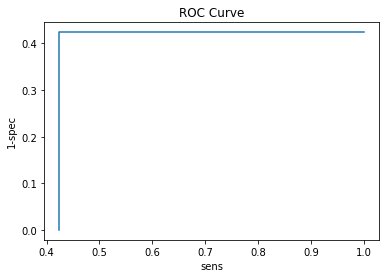

In [285]:
roc_curve(train_ds[['label']].values, y_pred)

Now we're going to apply the estimations on test set.

In [301]:
## test set
results = predict_NB(test_ds[['X', 'Y']], MLE_estimates)
y_pred = (results[:, 0] >= results[:, 1]).astype(int)

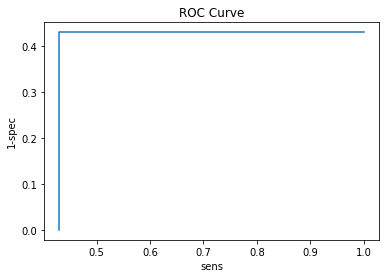

In [302]:
roc_curve(test_ds[['label']].values, y_pred)

# Q6
Use Quadratic Discriminant Analysis for `classification` data. The functions for question 5 can be used.

In [5]:
## we need to find the mean and covariance of each class

## divide into class 0 and class 1
train_ds_C0 = train_ds[train_ds.label == 0]
train_ds_C1 = train_ds[train_ds.label == 1]

train_ds_C0_X = train_ds_C0[['X', 'Y']]
train_ds_C0_Y = train_ds_C0[['label']]

train_ds_C1_X = train_ds_C1[['X', 'Y']]
train_ds_C1_Y = train_ds_C1[['label']]

mu0, sigma0 = find_MLE_Normal_distro(train_ds_C0_X.T)
mu1, sigma1 = find_MLE_Normal_distro(train_ds_C1_X.T)

In [6]:
## take a look at properties found
print("Class 0")
print(f'Covariance:\n{sigma0}\nMean vector:\n{mu0}\n')
print('--'*10)
print("Class 1")
print(f'Covariance:\n{sigma1}\nMean vector:\n{mu1}\n')

Class 0
Covariance:
              X            Y
X  97970.107123  4371.099911
Y   4371.099911   203.525003
Mean vector:
X   -46.389899
Y    -2.069022
dtype: float64

--------------------
Class 1
Covariance:
             X              Y
X   136.513008    6686.281659
Y  6686.281659  402111.038432
Mean vector:
X     1.212130
Y    72.971042
dtype: float64



Implementing The functions above and some other in a Class.

In [46]:
class QDA():
    """
    Quadratic Discriminant Analysis Class
    """
    def __init__(self):
        self.mu0 = None
        self.mu1 = None
        self.sigma0 = None
        self.sigma1 = None
    
    __
    def predict(self, X):
        """
        Predict the output for the X input
        
        Parameters:
        ------------
        X : array_like
            The data to be appended
        """
        mu0 = self.mu0
        mu1 = self.mu1
        sigma0 = self.sigma0
        sigma1 = self.sigma1
        
        ## check if the model is not learned and the parameters is updated
        ## checking one parameter is enough 
        ## because we are assigning a value to all in learning phase 
        if len(sigma0) == 0:
            raise "Error! First fit the model on a dataset then try to predict the values!"
        


        ## Find the probabilities for class 0
        ## save them in an array for furthur comparisons
        prediction = []
        for i in range(len(X)):
            ## Find the predicted Class of each data in class 0
            P_Class0 = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                             ,mu0, sigma0)

            P_Class1 = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                             ,mu1, sigma1)
            ## Compare and set the class to highest probability
            P = P_Class1 >= P_Class0

            ## Append the number of Class
            prediction.append(int(P))
        
        return prediction
    def fit(self, X, Y):
        """
        Learning the parameters of the model (Binary Classification model!)
        
        Parameters:
        -----------
        X : array_like
            the input values to be learned
        Y : array_like
            the label for the data (The binary classification task is here)
        """
        ## we need to find the mean and covariance of each class

        ## divide into class 0 and class 1
        train_ds_C0 = train_ds[train_ds.label == 0]
        train_ds_C1 = train_ds[train_ds.label == 1]

        train_ds_C0_X = train_ds_C0[['X', 'Y']]
        train_ds_C0_Y = train_ds_C0[['label']]

        train_ds_C1_X = train_ds_C1[['X', 'Y']]
        train_ds_C1_Y = train_ds_C1[['label']]

        mu0, sigma0 = self.__find_MLE_Normal_distro(train_ds_C0_X.T)
        mu1, sigma1 = self.__find_MLE_Normal_distro(train_ds_C1_X.T)
        
        ## Save the parameters of the model
        self.mu0 = mu0
        self.mu1 = mu1
        self.sigma0 = sigma0
        self.sigma1 = sigma1
            
    def __probability_multivariate_normal_distribution(self, X, mu, sigma):
        """
        The probability value for multivariate normal distribution function

        Parameters:
        ------------
        x : array_like
            the input data
        mu : array_like
            the means vector
        sigma : matrix_like
            the matrix representing the covariance

        Returns:
        --------
        probability : float
            the probability value for the x input values 
        """
        dimension = len(mu)

        ## divide the formula into 2 parts
        p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.det(sigma))

        ## some changes was made to the equation
        ## because of dataset shape
        p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))


        probability = p1 * p2

        return probability

    def __find_MLE_Normal_distro(self, X):
        """
        the maximum likelihood estimation for parameters of multivatiate normal distribution
        the parameters for normal distribution is covariance matrix and mean vector

        Parameters:
        ------------
        X : array_like
            the X input data vectors

        Returns:
        ---------
        mu : array_like
            the means vector
        covariance : matrix_like
            the matrix representing the covariance

        """

        mu = (1 / len(X.T)) * np.sum(X, axis=1)

        ## some changes was made to the ML estimation of covariance
        ## because of dataset shape
        covariance = (1 / len(X.T)) * ((X.T-mu).T @ (X.T-mu))    

        return mu, covariance
   

In [47]:
## convert probabilities to numpy array
model_QDA = QDA()

train_ds_X = train_ds[['X', 'Y']]
train_ds_Y = train_ds[['label']]

model_QDA.fit(train_ds_X,train_ds_Y)

In [48]:
test_Y_pred = model_QDA.predict(test_ds[['X','Y']])
train_Y_pred = model_QDA.predict(train_ds_X)

In [49]:
print(f'Mu0:\n{model_QDA.mu0}\n')
print(f'Mu1:\n{model_QDA.mu1}')

Mu0:
X   -0.976629
Y   -0.043558
dtype: float64

Mu1:
X    0.015640
Y    0.941562
dtype: float64


In [50]:
print(f'Covariance_0:\n {model_QDA.sigma0}\n')
print(f'Covariance_1:\n {model_QDA.sigma1}\n')

Covariance_0:
           X         Y
X  0.163509  0.040219
Y  0.040219  0.182233

Covariance_1:
           X         Y
X  0.329871  0.092079
Y  0.092079  0.283534



In [60]:
## test accuracy
test_Y = test_ds[['label']].values.flatten()

acc_test = (test_Y == test_Y_pred).sum() / len(test_Y_pred)
acc_test

0.9

In [89]:
def find_ROC(y_pred, y_true, thresholds = 101):
    """
    Find the confusion matrix for each threshold (ROC)
    
    Parameters:
    ------------
    y_true : array_like
        the actual output of inputs
    y_pred : array_like
        the predicted values of inputs
    thresholds : positive integer
        the count of thresholds to be evaluated between 0 and 1
        default is 101

    Returns:
    ---------
    df_scores : pandas dataframe
        dataframe contains the confusion matrix for different thresholds
    """

    assert thresholds >= 5, "Error: Thresholds must be more than 5!" 
    
    scores = []

    ## find the values for each threshold
    ## TP -> True Positive
    ## TN -> True Negative
    ## FP -> False Positive
    ## FN -> False Negative
    for threshold in np.linspace(0, 1, thresholds):
        TP = ((y_pred >= threshold) & (y_true == 1)).sum()
        TN = ((y_pred <= threshold) & (y_true == 0)).sum()
        FP = ((y_pred > threshold) & (y_true == 0)).sum()
        FN = ((y_pred < threshold) & (y_true == 1)).sum()
        

        scores.append([threshold, TP, TN, FP, FN])

    df_cols = ['threshold', 'TP', 'TN', 'FP', 'FN']
    df_scores = pd.DataFrame(scores, columns=df_cols)

    ## sensitivity and specificity
    ## True Positive rate = sensitivity
    df_scores['sens'] = df_scores.TP / (df_scores.TP + df_scores.FN)
    ## False Positive rate = 1 - specificity
    df_scores['1-spec'] = df_scores.FP / (df_scores.FP + df_scores.TN)

    return df_scores
def export_ROC_Curve(df_scores, description):
    """
    save the roc curve using the dataframe scores
    
    Parameters:
    ------------
    df_scores : array_like
        the results computed for different thresholds
    description : string
        the name of the saved file
    """

    plt.plot(df_scores['sens'], df_scores['1-spec'])
    plt.title(f'ROC Curve for {description}')
    plt.savefig(f'Q6_QDA_{description}.png')
    plt.close()

In [90]:
roc_scores = find_ROC(test_Y_pred, test_Y)
export_ROC_Curve(roc_scores, 'MLE')

In [91]:
roc_scores.iloc[np.linspace(0, 100, 10, dtype=int)]

,threshold,TP,TN,FP,FN,sens,1-spec
0,0.00,62,35,3,0,1.000000,0.078947
11,0.11,55,35,3,7,0.887097,0.078947
22,0.22,55,35,3,7,0.887097,0.078947
33,0.33,55,35,3,7,0.887097,0.078947
44,0.44,55,35,3,7,0.887097,0.078947
55,0.55,55,35,3,7,0.887097,0.078947
66,0.66,55,35,3,7,0.887097,0.078947
77,0.77,55,35,3,7,0.887097,0.078947
88,0.88,55,35,3,7,0.887097,0.078947
100,1.00,55,38,0,7,0.887097,0.000000
